In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mnist_train.csv').to_numpy()
labels = data[:,0]
data = data[:,1:]
mean = np.mean(data,axis=0)
data = data-mean

(784,)
(60000, 784)


In [3]:
def display(data,labels):
    for i in range(10):
        d = data[labels==i]
        plt.scatter(d[:,0],d[:,1],s=2)

In [4]:
def calc_del(X,C): 
    P = X @ C @ C.T
    P = P - X
    den = np.linalg.norm(P)
    Q = X.T @ P
    E = Q + Q.T
    E = E @ C
    E = E/den
    return E

In [5]:
def grd(data,alpha,bs,iters):
    C=np.random.rand(784,2)/data.shape[1]
    for i in range(iters):
        mask = np.random.choice([False, True], 60000, p=[1-bs, bs])
        dell = calc_del(data[mask],C)
        C = C - alpha*dell
    return C    

In [7]:
alpha = 0.000005
bs = 0.1
iters = 95
projected = data @ grd(data,alpha,bs,iters)
display(projected,labels)

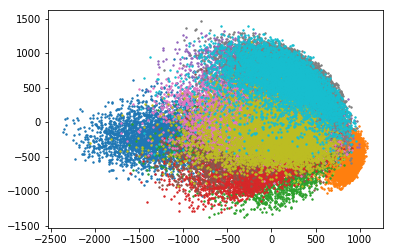

In [10]:
C = np.cov(data.T)
(V, D) = np.linalg.eigh(C)
V = V[::-1]
D = D.T[::-1].T
P = D[:, :2]
proj = data @ P
# plt.scatter(proj[:,0],proj[:,1],s=1)
display(proj,labels)